# Chapter 3-Finite Markov Decision Process

### 3.1 The Agent-Environment Interface
- The learner and decision maker is called <font color=#ff2222>agent</font>. The thing it interacts with, comprising everything outside the agent, is called the <font color=#ff2222>environment</font>.
- 在每个时间步$t$，agent接收environment的状态$S_t \in \mathcal{S}$（其中$\mathcal{S}$是一系列可能的状态），在词基础上选择一个动作$A_t \in \mathcal{A}(S_t)$（其中$\mathcal{A}(S_t)$是状态$S_t$下可被选择的一系列动作）。在下一个时间步$t+1$，agent将接收一个数值reward $R_{t+1}\in\mathcal{R}\subset\mathbb{R}$，environment处于新的状态$S_{t+1}$。下图展示了agent-environment之间的交互。

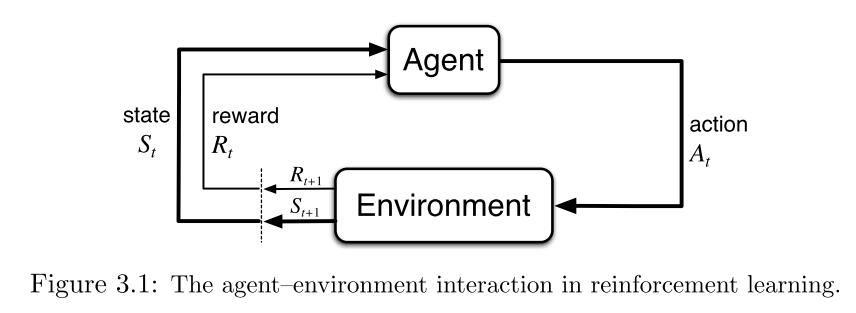

In [1]:
from IPython.display import Image 
Image(filename='D:\WeX\Code\QieLearning\Reinforcement Learning\Pics\Figure 3.1.jpg')

- 在每一个时间步，agent实现一个从状态到选择每个可能动作概率的映射，这个映射称为agent的<font color=#ff2222>policy</font>，用$\pi_t$表示，其中$\pi_t(a|s)$是$S_t=s$时动作$A_t=a$的概率。
- 强化学习方法指明了agent怎样通过其经验改变其策略。粗略的说，agent的目标是最大化其长期收到的总reward。
- 这个框架是抽象且灵活的，可以以很多种方式应用到很多不同的问题上。
- **如何区分agent和environment：**<br>
一般的规则是任何不能被agent任意改变的东西都被认为在agent外部，是environment的一部分。虽然我们不假设环境中的所有对agent都是未知的，但是我们通常认为reward计算发生在agent外部，因为其定义了agent所面临的任务从而不能被agent任意改变。<font color=#ff2222>environment的边界代表了agent绝对控制的极限，而非知识的极限。</font>
- **任何目标导向的学习问题都可以被简化为三个信号在agent和environment之间来回传递：一个信号代表了agent做出的选择(the actions)，一个信号代表了选择所依赖的基础(the states)，一个信号定义了agent的目标(therewards)**

### 3.2 Goals and Rewards
- Reward hypothesis<br>
That all of what we mean by goals and purpose can be well thought of as the maximization of the expected value of the cumulative sum of a received scalar signal(called reward).<br>
我们所说的goal和purpose都可以被认为是最大化-接收到的累积标量信号（reward）之期望
- reward是在agent外部计算。我们将agent和environment的边界置于agent的控制极限处而非物理边界，因为agent的最终目标通常和他们没有完美控制的东西有关。

### 3.3 Returns
- **task分类**
    - **episodic task：**agent-environment交互可以天然地被分解成许多子序列，我们称之为episode。每一个episode都以一个特殊的状态即terminal state结尾。
    - **continuing task：**agent-environment交互不可以天然地被分解成episode，而是连续的没有限制的。这种情况下需要不同的return定义，防止return趋于无穷大。
        - **discounted return**<br>
        $$G_t = \sum\limits_{k=0}^\infty{\gamma^kR_{t+k+1}}$$
        其中$0\le\gamma\le1$称为discount rate，其决定了未来reward的现值。

### 3.4 Unified Notation for Episodic and Continuing Tasks
- **absorbing state**<br>
吸收态只会转移到自身，且产生的reward为0。引入吸收态后我们就可以统一episodic和continuing task回报return的计算。
$$G_t = \sum\limits_{k=0}^\infty{\gamma^kR_{t+k+1}}$$
吸收态将把无限项求和截断成有限项求和。<br>
我们也可以将return写为：
$$G_t = \sum\limits_{k=0}^{T-t-1}{\gamma^kR_{t+k+1}}$$
其中，有可能$T=\infty$或$\gamma=1$（两者不能同时成立）。

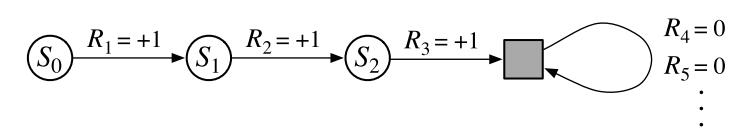

In [3]:
Image(filename=r'D:\WeX\Code\QieLearning\Reinforcement Learning\Pics\3.4-absorbing state.jpg')

### 3.5 The Markov Property
在强化学习框架中，agent通过环境状态信号的函数来做决策。在本节中我们将讨论哪些性质是状态信号所需的，以及哪些信息是不能指望环境状态信号给出的。特别的我们正式定义环境和他们状态信号的一种特别有意思的性质，我们称之为马尔可夫性。<br>
本书中，状态代表了任何可以被agent获取的信息。我们假设状态由名义上隶属于环境的预处理系统给出。我们不在本书中讲述构建、改变或学习状态信号的问题，并不是因为我们觉得状态表达不重要，而是为了更加集中在决策问题上。Certainly the state signal should include immediate sensations such as sensory measurements, but it can contain much more than that. State representations can be highly processed versions of original sensations, or they can be complex structures built up over time from the sequence of sensations.<br>
另一方，状态信号不一定包含一切环境的信息，甚至不一定包含一切对决策有帮助的信息。
#### Markov property
$$
\begin{align}
Pr\big\{S_{t+1}=s',R_{t+1} = r\mid S_0,A_0,R_1,\cdots,S_{t-1},A_{t-1},R_t,S_t,A_t\big\} &= Pr\big\{S_{t+1}=s',R_{t+1}\mid S_t=s,A_t=a\big\}\\
                                                           &= p(s',r\mid s,a)
\end{align}$$
满足上式的状态信号、具有马尔可夫性。如果一个环境具有马尔可夫性，那么我们可以通过$p(s',r|s,a)$预测下一个状态和预期reward。迭代计算，我们可以预测所有未来的状态和reward。<br>
<font color=#ff2222>即使状态不具有马尔可夫性，想强化学习中的状态近似成马尔科夫状态也是合适的。</font>因为马尔可夫提供了一个很难被超越的预测基础，有利于未来reward、state的预测以及动作的选取。<font color=#ff2222>对强化学习来说，没有完美的马儿可夫状态表达可能并不是一个严重的问题。</font>




### Markov Decision Process
满足马尔可夫性的强化学习任务被称为**马尔可夫决策过程（MDP）**，如果状态和动作空间是有限的，则其被称为**有限马尔可夫决策过程（finite MDP）**。
一种特殊的有限MDP由其状态和动作集合以及环境的one-step dynamics定义。 Given any state and action $s$ and $a$, the probability of each possible pair of next state and reward, $s'$,$r$, is denoted：
$$p(s',r\mid s,a)=Pr\{S_{t+1}=s',R_{t+1}=r\mid S_t=a,A_t=a\}$$
这些量完全阐释了有限MDP的动态过程。通过这个动态过程，我们可以计算几乎所有我们想知道的和环境有关的量，譬如：
- **状态动作对称的期望rewards | expected rewards for state-action pairs**
$$
\begin{align}
r(s,a) &= \mathbb{E}[R_{t+1}\mid S_t=s,A_t=a]\\
     &=\sum\limits_{r\in R}r\sum\limits_{s'\in \mathcal{S}}p(s',r\mid s,a)
\end{align}
$$
- **状态转移概率 | state-transition probabilities**
$$
\begin{align}
p(s'\mid s,a) &=Pr\{S_{t+1}=s'\mid S_t=s,A_t=a\}\\
          &=\sum_{r\in\mathcal{R}}p(s',r\mid s,a)
\end{align}
$$
- **状态-动作-下一状态三元组的期望rewards | expected rewards for state-action-next-state triples**
$$
\begin{align}
r(s,a,s') &=\mathbb{E}[R_{t+1}\mid S_t=s,A_t=a,S_{t+1}=s']\\
       &= \frac{\sum\limits_{r\in\mathcal{R}}rp(s',r\mid s,a)}{p(s'\mid s,a)}
\end{align}
$$

#### Transition graph
transition graph是一个概括有限MDP动态过程的有用工具，如下图所示。其中有两种节点，状态节点和动作节点。状态节点对应于每个可能的状态，动作节点对应于每个状态-动作对。每一个箭头对应于一个三元组$(s,s',a)$,离开$(s,a)$，指向下一个状态$s'$。箭头上标记有转移概率$p(s'|s,a)$和转移的期望收益$r(s,a,s')$。注意到从一个动作节点射出的两个箭头上标记的转移概率之和为1。

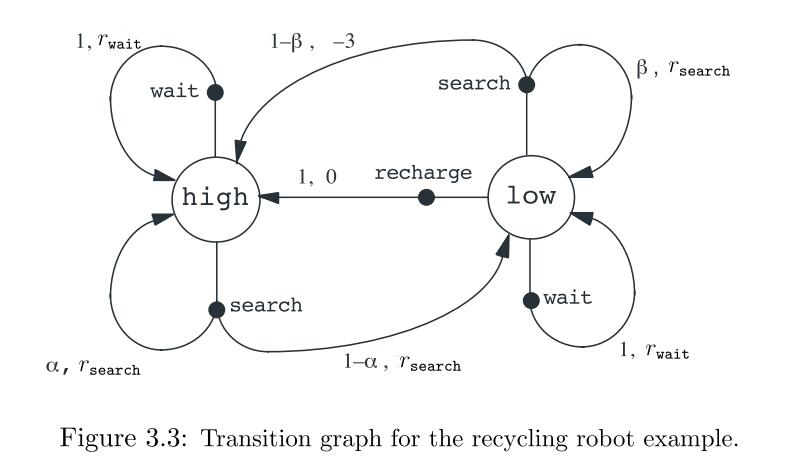

In [4]:
Image(filename=r'D:\WeX\Code\QieLearning\Reinforcement Learning\Pics\Figure 3.3-transition graph.jpg')

### 3.7 Value Functions
几乎所有的强化学习都涉及到估计价值函数，其是状态（或 状态动作对）的函数，用来估计agent处在给定状态（或在给定状态下执行给定动作）的好坏程度。
- **state-value function for policy $\pi$: $v_\pi$**<br>
value of a state $s$ under a policy $\pi(a\mid s)$：
$$
\begin{align}
V_{\pi}(s) &=\mathbb{E}_{\pi}[G_t\mid S_t=s]\\
        &=\mathbb{E}_{\pi}[\sum\limits_{k=0}^\infty \gamma^k R_{t+k+1}\mid S_t=s]
\end{align}$$
其中$\mathbb{E}_\pi[\cdot]$表示在agent服从策略$\pi$的条件下一个随机变量的期望。
- **action-value function for policy $\pi$: $q_\pi$**<br>
value of taking action $a$ in state $s$ under a policy $\pi$：
$$
\begin{align}
q_\pi(s,a) &=\mathbb{E}_{\pi}[G_t\mid S_t=s,A_t=a]\\
        &=\mathbb{E}_{\pi}\Big[\sum\limits_{k=0}^{\infty}\gamma^{k}R_{t+k+1}\Big| S_t=s,A_t=a\Big]
\end{align}
$$

#### 价值函数的估计
- **Monte Carlo method**
    - 对许多实际回报（状态或状态动作对的回报）的随机样本求平均
    - Monte Carlo不适合处理状态很多的情况。

- **parameterized function**
    - $v_\pi$、$q_\pi$是某些参数的函数，通过调节这些参数使得它们和观察到的return更吻合。
    - 由于参数个数要比状态少，所以该方法可以用来处理状态很多的情况。

#### Bellman Equation
- **状态价值的Bellman方程**
$$
\begin{align}
v_{\pi}(s) &= \mathbb{E}_{\pi}[G_t\mid S_t=s]\\
        &= \mathbb{E}_{\pi}\Big[R_{t+1}+\gamma\sum\limits_{k=0}^{\infty}{\gamma^{k}R_{t+k+2}}\Big| S_t=s\Big]\\
        &= \sum\limits_a{\pi(a\mid s)}\sum\limits_{s',r}{p(s',r\mid s,a)\big[r+\gamma v_{\pi}(s')\big]},\quad \forall s\in \mathcal{S}
\end{align}
$$
其中$a\in \mathcal{A}(s)$，$s'\in \mathcal{S}$(episodic problem中为$\mathcal{S}^+$)
- **动作价值的Bellman方程**
$$
\begin{align}
q_{\pi}(s,a) &= \mathbb{E}_{\pi}[G_t\mid S_t=s,A_t=a]\\
         &= \mathbb{E}_{\pi}\Big[R_{t+1}+\gamma\sum\limits_{k=0}^{\infty}{\gamma^{k}R_{t+k+2}}\Big| S_t=s,A_t=a\Big]\\
         &= \sum\limits_{s',r}{p(s',r\mid s,a)\big[r+\gamma v_{\pi}(s')\big]},\quad \forall s\in \mathcal{S}
\end{align}
$$
因此有：
$$v_{\pi}(s)=\sum\limits_a{\pi(a\mid s)q_{\pi}(s,a)}$$
- **Backup diagram (Backup=Update)**
backup diagram展示了强化学习的更新操作，这些操作将价值信息从后续状态（或状态动作对）传递回当前状态（或状态动作对）。和前面提到的transition graph不同的是，backup diagram中的前后状态并不要求不同，可以是自身，其展示的是信息在时间上的流动。backup diagram可以作为算法的图形化概括。

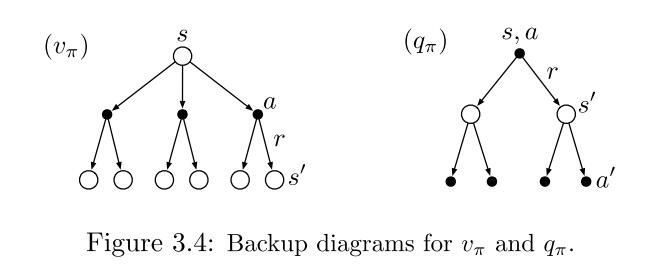

In [6]:
Image(filename=r'D:\WeX\Code\QieLearning\Reinforcement Learning\Pics\Figure 3.4-backup diagrams.jpg')

### 3.8 Optimal Value Functions
- **optimal policy**
    - 当且仅当对所有的$s\in\mathcal{S}$都有$v_\pi(s)\ge v_{\pi'}(s)$时，我们说$\pi\ge\pi'$，也就是说策略$\pi$比$\pi'$好或和它一样好。
    - 至少存在一个策略比所有其他策略都好或一样好，这个策略称为optimal policy。可能存在多个optimal policy，我们统一用$\pi_*$表示。他们有一样的状态价值函数，我们称之为***optimal state-value function***，用$v_*$表示。
    $$v_*(s) = \max\limits_{\pi}v_\pi(s)\quad\forall s\in\mathcal{S}$$
    optimal policy也具有相同的***optimal action-value function***，用$q_*$表示。
    $$
    \begin{align}
    q_*(s,a) &= \max\limits_{\pi}q_\pi(s,a) \quad\forall s\in\mathcal{S}\ and\ a\in\mathcal{A}(s)\\
          &= \mathbb{E}\big[R_{t+1}+\gamma v_*(S_{t+1})\mid S_t=s,A_t=a\big]
    \end{align}
    $$
    
- **Bellman optimality equation**
    - **Bellman optimality equation for $v_*$**
$$
\begin{align}
v_*(s) &= \max\limits_{a\in\mathcal{A}(s)}q_{\pi_*}(s,a)\\
     &= \max\limits_{a\in\mathcal{A}(s)}\mathbb{E}_{\pi_*}\Big[R_{t+1}+\gamma v_*(S_{t+1})\Big| S_t=s,A_t=a\Big]\\
     &= \max\limits_{a\in\mathcal{A}(s)}\sum\limits_{s',r}p(s',r\mid s,a)[r+\gamma v_*(s')]
\end{align}
$$
也就是说，在最优策略下，状态的价值必须与该状态后最好的action的预期回报相等。
    - **Bellman optimality equation for $q_*$**
$$
\begin{align}
q_*(s,a) &= \mathbb{E}\Big[ R_{t+1}+\gamma\max\limits_{a'}q_*(S_{t+1},a')\Big| S_t=s,A_t=a \Big]\\
       &= \sum\limits_{s',r}p(s',r\mid s,a)\big[ r+\gamma\max\limits_{a'}q_*(s',a') \big]
\end{align}
$$

- 确定optimal policy
any policy that is greedy with respect to the optimal evaluation function $v_*$ is an optimal policy.
    - greedy：The term greedy is used in computer science to describe any search or decision procedure that selects alternatives based only on local or immediate considerations,without considering the possibility that such a selection may prevent future access to even better alternatives.
    - $v_*$精妙的地方是，如果用它来评估动作的短期回报——尤其是下一步回报——来决定下一步动作，那么这样一个greedy policy实际上在长期是最优的，因为$v_*$已经将所有可能的未来路径的回报纳入了考量。也就是说，最优的长期回报期望被化成一个只与当前状态有关的值，从而可以通过简单的贪婪操作来决定策略。
    - 使用$q_*$来决定最优动作更为容易，我们无需做向前一步搜索，对任意状态$s$，只需选择最大的$q_*(s,a)$对应的动作。因为action-value function已经缓存了向前一步搜索的结果了。<font color=#ff2222>虽然构建状态-动作对的函数要比仅构建状态的函数更难，但是optimal action-value function允许在不知道任何可能的后续状态及他们价值（也就是任何environment dynamics相关的信息）时，选择最优动作。</font>

### Optimality and Approximation
计算能力和存储能力有限，近似方法对于实际问题的求解是必需的。